In [1]:
from modelskill import ModelResult, PointObservation, Connector
import modelskill.metrics as mtr 
%matplotlib inline

In [2]:
fn = '../tests/testdata/TS.dfs0'
mr = ModelResult(fn, name='OresundHD', item='Klagshamn: Surface elevation')
print(mr)
print(mr.data)

<PointModelResult> 'OresundHD'
- Item: Klagshamn: Surface elevation
                     Klagshamn: Surface elevation
2018-03-04 00:00:00                      0.018723
2018-03-04 00:05:00                      0.014833
2018-03-04 00:10:00                      0.011230
2018-03-04 00:15:00                      0.007876
2018-03-04 00:20:00                      0.004712
...                                           ...
2018-03-10 23:40:00                      0.225920
2018-03-10 23:45:00                      0.229034
2018-03-10 23:50:00                      0.232193
2018-03-10 23:55:00                      0.235325
2018-03-11 00:00:00                      0.238351

[2017 rows x 1 columns]


In [3]:
fn = '../tests/testdata/smhi_2095_klagshamn.dfs0'
o1 = PointObservation(fn, x=366844.15, y=6154291.6, item=0, name='Klagshamn') 
print(o1)
print(o1.n_points, o1.start_time)

PointObservation: Klagshamn, x=366844.15, y=6154291.6
50328 2015-01-01 01:00:00


In [4]:
con = Connector(o1, mr, validate=False)
con

c:\users\jem\source\modelskill\modelskill\connection.py:180: UserWarning: Item type mismatch! Obs 'Klagshamn' item: Water Level, model 'OresundHD' item: Surface Elevation
  warnings.warn(


<Connector> with 
 -<PointConnector> obs=Klagshamn(n=50328) :: model=OresundHD

In [5]:
cc = con.extract()
cc

<ComparerCollection>
PointComparer: Klagshamn

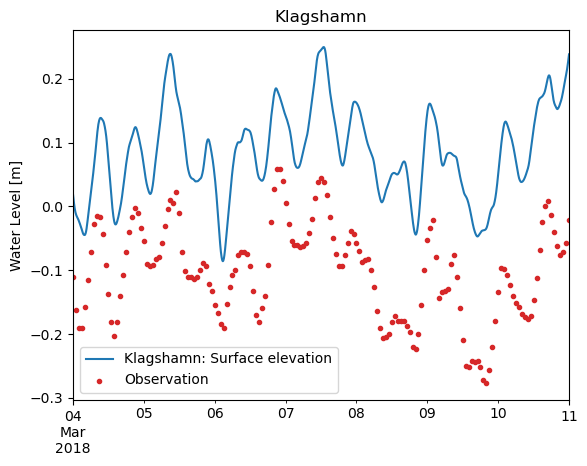

In [6]:
cc["Klagshamn"].plot_timeseries();

In [7]:
cmp = cc["Klagshamn"]
cmp.skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
Klagshamn,169,0.187172,0.191682,0.041336,0.187172,0.8423,0.385711,-5.549174


In [8]:
mtr.rmse(cmp.obs, cmp.mod, unbiased=False)

0.19168248446362082